In [7]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

In [8]:
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'



In [9]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [10]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

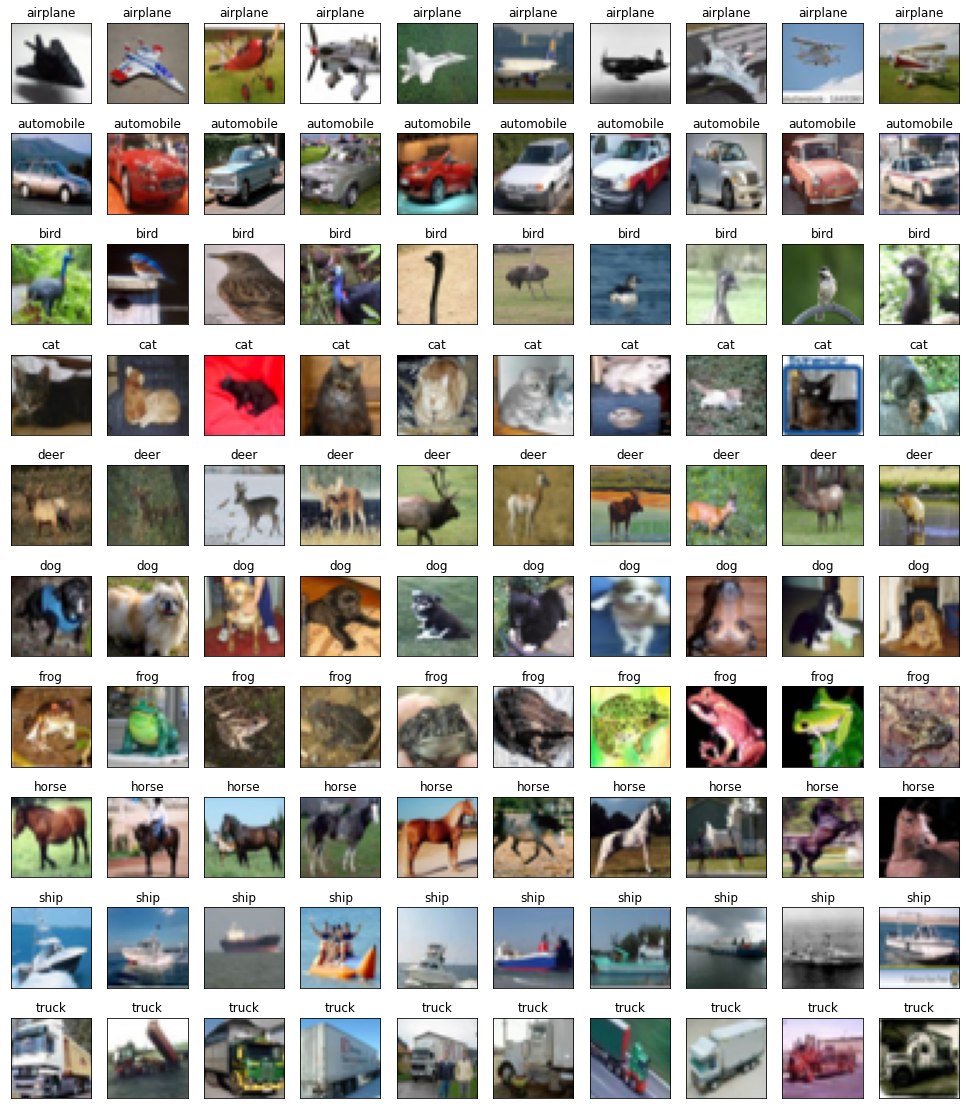

In [11]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes = plt.subplots(ncols=10, nrows=10, figsize=(17, 20))
for i in range(10):
    index = 0
    j = 0
    while (j < 10):
        if y_train[index][i] == 1:            
            axes[i,j].set_title(labels[i])
            axes[i,j].imshow(x_train[index])
            axes[i,j].get_xaxis().set_visible(False)
            axes[i,j].get_yaxis().set_visible(False)
            j += 1
        index += 1
plt.show()
org_image = x_train[0]

In [12]:
datagen = ImageDataGenerator(
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

width_shift_range


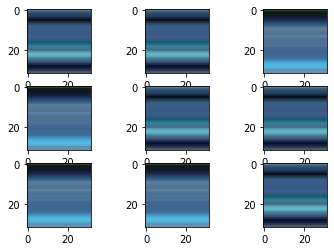

horizontal_flip


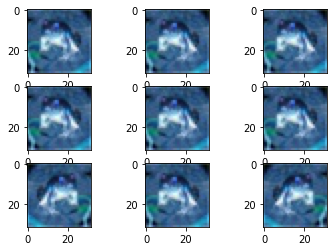

In [14]:
# Let's apply ImageDataGenerator to one of the image
import cv2
cv2.imwrite('org_image.jpg', org_image)
#print(org_image)

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# we first load the image
image = load_img('org_image.jpg')
# we converting the image which is in PIL format into the numpy array, so that we can apply deep learning methods
dataImage = img_to_array(image)
# print(dataImage)
# expanding dimension of the load image
imageNew = expand_dims(dataImage, 0)
# print(imageNew)
# now here below we creating the object of the data augmentation class
print('width_shift_range')
imageDataGen = ImageDataGenerator(width_shift_range=[-200,200])
# because as we alreay load image into the memory, so we are using flow() function, to apply transformation
iterator = imageDataGen.flow(imageNew, batch_size=1)
# below we generate augmented images and plotting for visualization
for i in range(9):
    # we are below define the subplot
    plt.subplot(330 + 1 + i)
    # generating images of each batch
    batch = iterator.next()
    # again we convert back to the unsigned integers value of the image for viewing
    image = batch[0].astype('uint8')
    # we plot here raw pixel data
    plt.imshow(image)
# visualize the the figure
plt.show()

print('horizontal_flip')
imageDataGen = ImageDataGenerator(horizontal_flip=True)
# because as we alreay load image into the memory, so we are using flow() function, to apply transformation
iterator = imageDataGen.flow(imageNew, batch_size=1)
# below we generate augmented images and plotting for visualization
for i in range(9):
    # we are below define the subplot
    plt.subplot(330 + 1 + i)
    # generating images of each batch
    batch = iterator.next()
    # again we convert back to the unsigned integers value of the image for viewing
    image = batch[0].astype('uint8')
    # we plot here raw pixel data
    plt.imshow(image)
# visualize the the figure
plt.show()

In [15]:
# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

In [16]:
 # Fit the model on the batches generated by datagen.flow().
import time
start_time = time.time()
history = model.fit(datagen.flow(x_train, y_train,
                                     batch_size=batch_size), epochs=epochs,
                    validation_data=(x_test, y_test), 
                    workers=4)
print("--- %s minutes ---" % round((time.time() - start_time)/60,2))

Epoch 1/20
1563/1563 [==============================] - 147s 93ms/step - loss: 1.9967 - accuracy: 0.2568 - val_loss: 1.5315 - val_accuracy: 0.4425
Epoch 2/20
1563/1563 [==============================] - 151s 96ms/step - loss: 1.6073 - accuracy: 0.4118 - val_loss: 1.5038 - val_accuracy: 0.4570
Epoch 3/20
1563/1563 [==============================] - 148s 95ms/step - loss: 1.4771 - accuracy: 0.4635 - val_loss: 1.2831 - val_accuracy: 0.5392
Epoch 4/20
1563/1563 [==============================] - 144s 92ms/step - loss: 1.3995 - accuracy: 0.4932 - val_loss: 1.2382 - val_accuracy: 0.5625
Epoch 5/20
1563/1563 [==============================] - 141s 90ms/step - loss: 1.3260 - accuracy: 0.5252 - val_loss: 1.2086 - val_accuracy: 0.5747
Epoch 6/20
1563/1563 [==============================] - 151s 97ms/step - loss: 1.2728 - accuracy: 0.5463 - val_loss: 1.1511 - val_accuracy: 0.5971
Epoch 7/20
1563/1563 [==============================] - 160s 102ms/step - loss: 1.2029 - accuracy: 0.5703 - val_loss: 

In [17]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at C:\Users\HP\Desktop\E Books\Sem3\DL Assignment Group 14\saved_models\keras_cifar10_trained_model.h5 
313/313 [==============================] - 4s 13ms/step - loss: 0.7687 - accuracy: 0.7322
Test loss: 0.7686734199523926
Test accuracy: 0.732200026512146


In [18]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


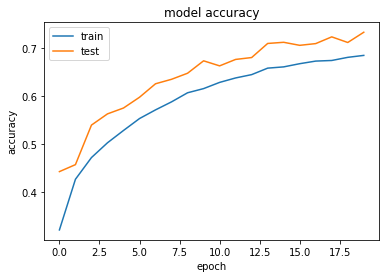

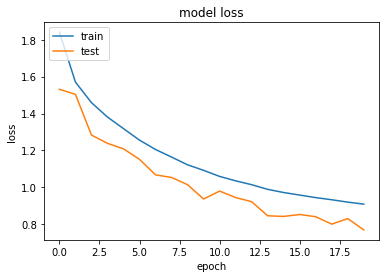

In [19]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

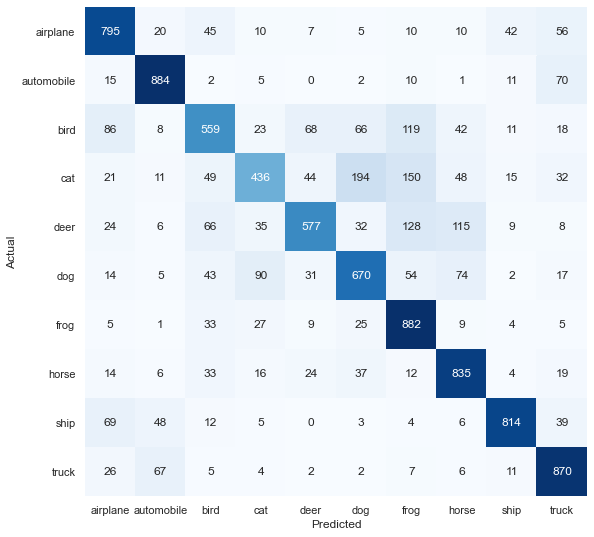

In [20]:
import numpy as np
import seaborn as sns; sns.set()
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(x_test),axis=1)
cm = confusion_matrix(y_test_arg, Y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

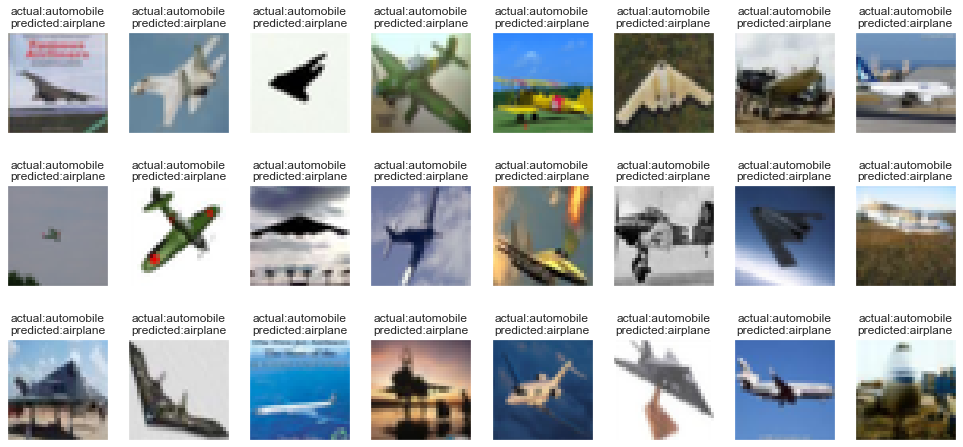

In [21]:
fig, axes = plt.subplots(ncols=8, nrows=3, sharex=False, sharey=True, figsize=(17, 8))
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
y_test = y_test.astype(int)
predictions = model.predict(x_test)
predictions = predictions.astype(int)
index = 0
for i in range(3):    
    j = 0
    while (j < 8):
        if labels[y_test[index][0]]!=labels[predictions[index][0]]:
            axes[i,j].set_title('actual:' + labels[y_test[index][0]] + '\n' 
                            + 'predicted:' + labels[predictions[index][0]])
            axes[i,j].imshow(x_test[index])
            axes[i,j].get_xaxis().set_visible(False)
            axes[i,j].get_yaxis().set_visible(False)
            j = j + 1
        index =  index + 1
plt.show()

In [22]:
# Hyperparameter Tuning
## Batch Size: Change the value of batch size in model training

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

 # Fit the model on the batches generated by datagen.flow().
import time
start_time = time.time()
history = model.fit(datagen.flow(x_train, y_train,
                                     batch_size=batch_size), epochs=epochs,
                    validation_data=(x_test, y_test), 
                    workers=4)
print("--- %s minutes ---" % round((time.time() - start_time)/60,2))

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/20
1563/1563 [==============================] - 173s 110ms/step - loss: 2.2135 - accuracy: 0.1683 - val_loss: 2.0439 - val_accuracy: 0.2521
Epoch 2/20
1563/1563 [==============================] - 172s 110ms/step - loss: 2.0298 - accuracy: 0.2600 - val_loss: 1.9083 - val_accuracy: 0.3248
Epoch 3/20
1563/1563 [==============================] - 172s 110ms/step - loss: 1.9583 - accuracy: 0.2925 - val_loss: 1.8201 - val_accuracy: 0.3503
Epoch 4/20
1563/1563 [==============================] - 178s 114ms/step - loss: 1.8787 - accuracy: 0.3194 - val_loss: 1.7327 - val_accuracy: 0.3759
Epoch 5/20
1563/1563 [==============================] - 184s 118ms/step - loss: 1.7886 - accuracy: 0.3543 - val_loss: 1.6254 - val_accuracy: 0.4193
Epoch 6/20
1563/1563 [==============================] - 180s 115ms/step - loss: 1.7115 - accuracy: 0.3845 - val_loss: 1.5567 - val_accuracy: 0.4411
Epoch 7/20
1563/1563 [==============================] - 179s 115ms/step - loss: 1.6651 - accuracy: 0.4040 - val_

In [ ]:
# Hyperparameter Tuning
## Dropout: Change the position and value of dropout layer

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

 # Fit the model on the batches generated by datagen.flow().
import time
start_time = time.time()
history = model.fit(datagen.flow(x_train, y_train,
                                     batch_size=batch_size), epochs=epochs,
                    validation_data=(x_test, y_test), 
                    workers=4)
print("--- %s minutes ---" % round((time.time() - start_time)/60,2))

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])